<a href="https://colab.research.google.com/github/TheRealMrR/challenge1-data-science-latam/blob/main/analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [5]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



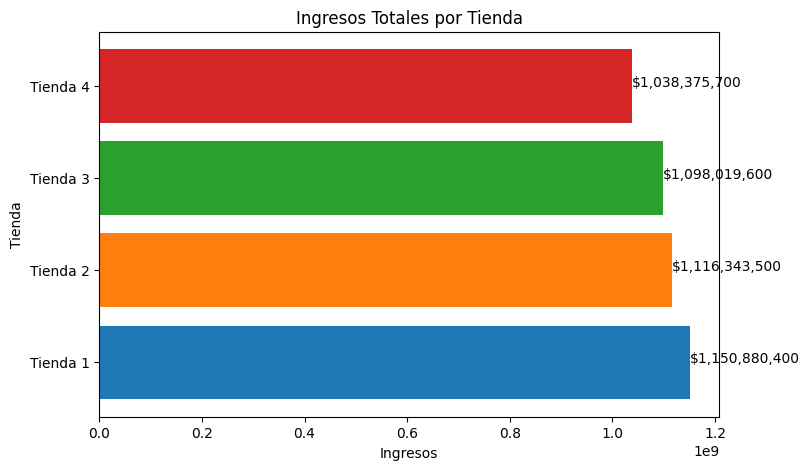

In [26]:
# Calcular ingresos
ingresos = [
    tienda['Precio'].sum(),
    tienda2['Precio'].sum(),
    tienda3['Precio'].sum(),
    tienda4['Precio'].sum()
]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Gráfico de columnas (barh)
plt.figure(figsize=(8, 5))
bars = plt.barh(tiendas, ingresos, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title("Ingresos Totales por Tienda")
plt.xlabel("Ingresos")
plt.ylabel("Tienda")

# Añadir valores en las barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 100, bar.get_y() + bar.get_height()/2, f"${width:,.0f}")

plt.show()


# 2. Ventas por categoría

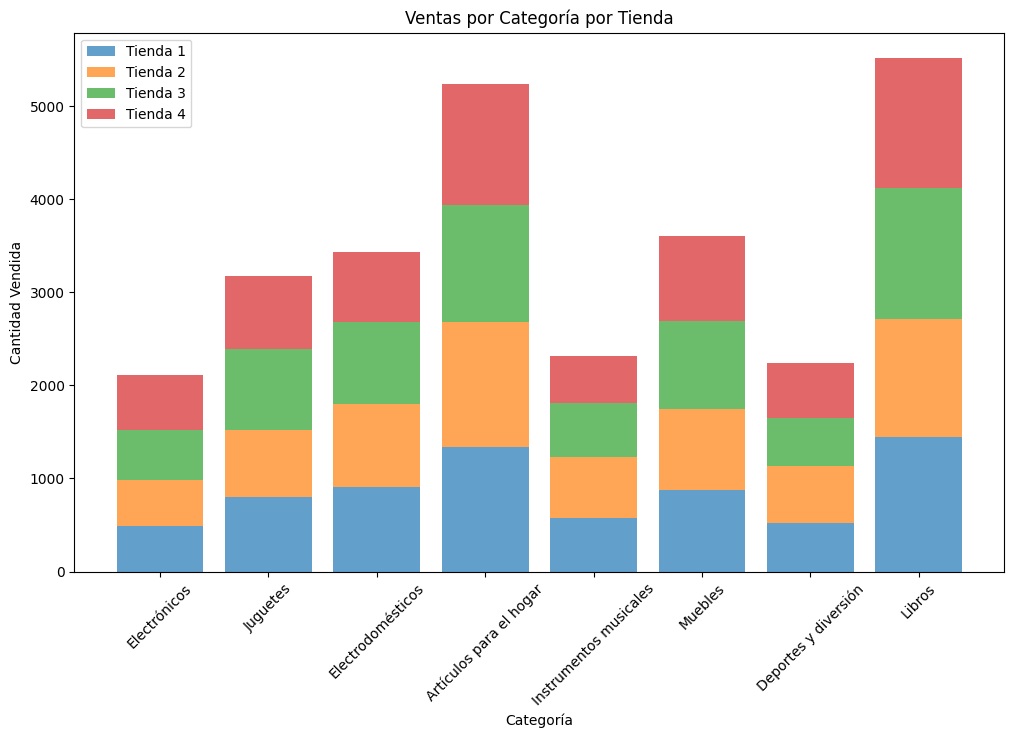

In [10]:
# Ventas por categoría
ventas_por_categoria_1 = tienda.groupby('Categoría del Producto')['Cantidad de cuotas'].sum()
ventas_por_categoria_2 = tienda2.groupby('Categoría del Producto')['Cantidad de cuotas'].sum()
ventas_por_categoria_3 = tienda3.groupby('Categoría del Producto')['Cantidad de cuotas'].sum()
ventas_por_categoria_4 = tienda4.groupby('Categoría del Producto')['Cantidad de cuotas'].sum()

# Crear un gráfico de barras apiladas para ventas por categoría
categorias = list(set(ventas_por_categoria_1.index) | set(ventas_por_categoria_2.index) | set(ventas_por_categoria_3.index) | set(ventas_por_categoria_4.index))

plt.figure(figsize=(12, 7))
plt.bar(categorias, ventas_por_categoria_1, label='Tienda 1', alpha=0.7)
plt.bar(categorias, ventas_por_categoria_2, bottom=ventas_por_categoria_1, label='Tienda 2', alpha=0.7)
plt.bar(categorias, ventas_por_categoria_3, bottom=ventas_por_categoria_1 + ventas_por_categoria_2, label='Tienda 3', alpha=0.7)
plt.bar(categorias, ventas_por_categoria_4, bottom=ventas_por_categoria_1 + ventas_por_categoria_2 + ventas_por_categoria_3, label='Tienda 4', alpha=0.7)

plt.title('Ventas por Categoría por Tienda')
plt.xlabel('Categoría')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.legend()
plt.show()



In [11]:
# Ventas por tienda y categoría
ventas_por_tienda_categoria_1 = tienda.groupby('Categoría del Producto')['Cantidad de cuotas'].sum()
ventas_por_tienda_categoria_2 = tienda2.groupby('Categoría del Producto')['Cantidad de cuotas'].sum()
ventas_por_tienda_categoria_3 = tienda3.groupby('Categoría del Producto')['Cantidad de cuotas'].sum()
ventas_por_tienda_categoria_4 = tienda4.groupby('Categoría del Producto')['Cantidad de cuotas'].sum()

# Crear un DataFrame para las ventas de cada tienda y categoría
ventas_tienda_categoria = pd.DataFrame({
    'Tienda 1': ventas_por_tienda_categoria_1,
    'Tienda 2': ventas_por_tienda_categoria_2,
    'Tienda 3': ventas_por_tienda_categoria_3,
    'Tienda 4': ventas_por_tienda_categoria_4
})

# Rellenar los valores NaN con 0 (por si alguna categoría no existe en todas las tiendas)
ventas_tienda_categoria = ventas_tienda_categoria.fillna(0)

# Mostrar las primeras filas del DataFrame resultante
print(ventas_tienda_categoria.head())


                         Tienda 1  Tienda 2  Tienda 3  Tienda 4
Categoría del Producto                                         
Artículos para el hogar       489       493       542       590
Deportes y diversión          796       720       873       786
Electrodomésticos             906       890       882       756
Electrónicos                 1341      1333      1262      1293
Instrumentos musicales        573       659       580       500


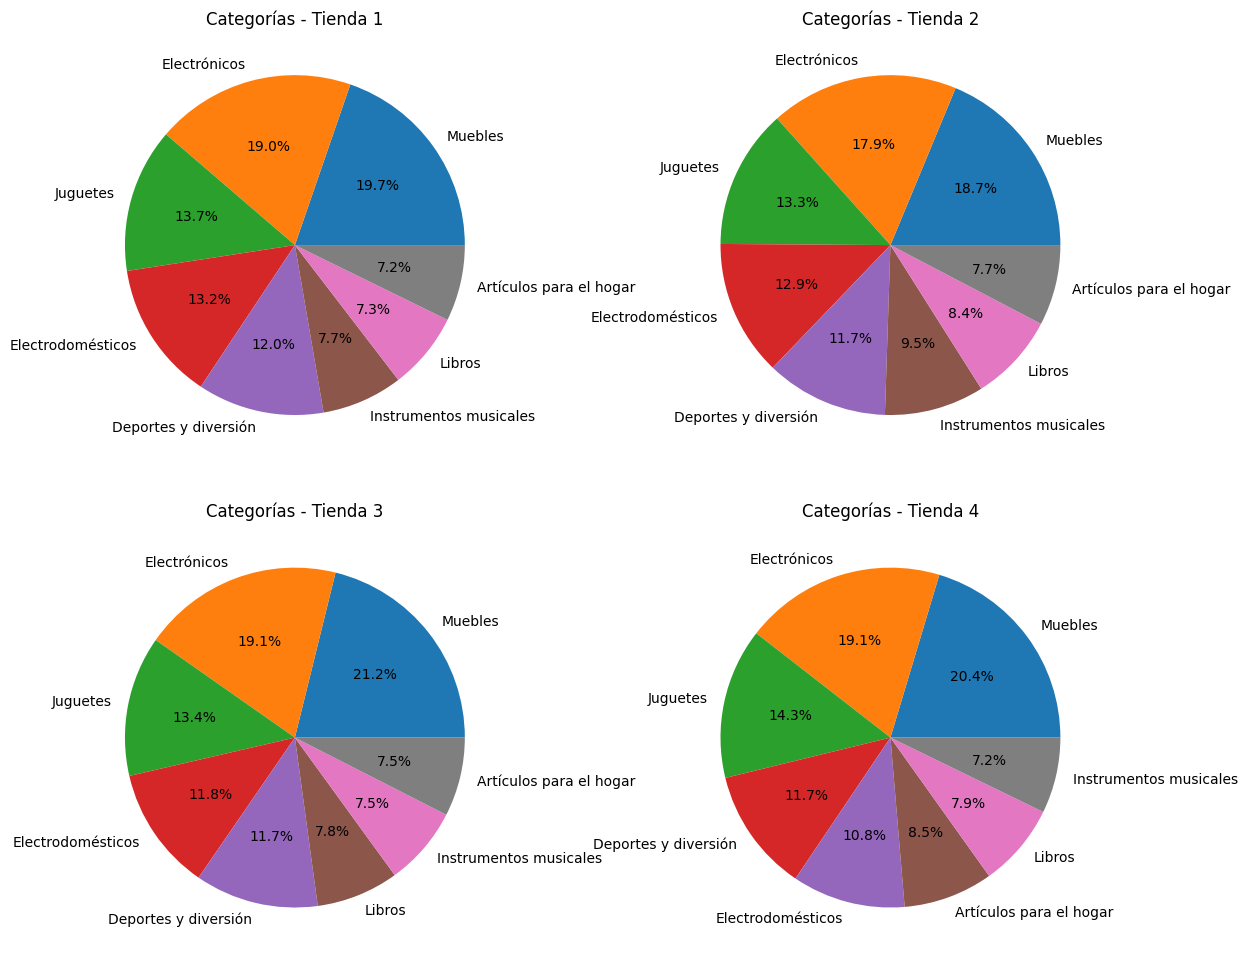

In [25]:
# Agrupar y contar ventas por categoría en cada tienda
ventas_categoria_t1 = tienda['Categoría del Producto'].value_counts()
ventas_categoria_t2 = tienda2['Categoría del Producto'].value_counts()
ventas_categoria_t3 = tienda3['Categoría del Producto'].value_counts()
ventas_categoria_t4 = tienda4['Categoría del Producto'].value_counts()

# Graficar con gráfico de pastel (pie chart)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].pie(ventas_categoria_t1, labels=ventas_categoria_t1.index, autopct='%1.1f%%')
axs[0, 0].set_title('Categorías - Tienda 1')

axs[0, 1].pie(ventas_categoria_t2, labels=ventas_categoria_t2.index, autopct='%1.1f%%')
axs[0, 1].set_title('Categorías - Tienda 2')

axs[1, 0].pie(ventas_categoria_t3, labels=ventas_categoria_t3.index, autopct='%1.1f%%')
axs[1, 0].set_title('Categorías - Tienda 3')

axs[1, 1].pie(ventas_categoria_t4, labels=ventas_categoria_t4.index, autopct='%1.1f%%')
axs[1, 1].set_title('Categorías - Tienda 4')

plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


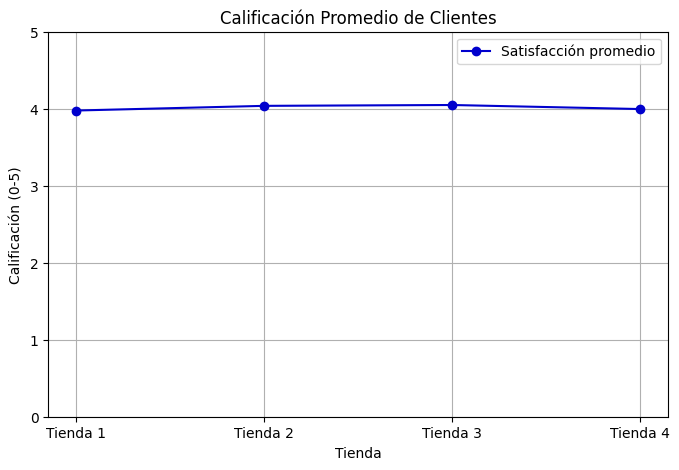

In [31]:
# Calificaciones promedio
calificaciones = [
    tienda['Calificación'].mean(),
    tienda2['Calificación'].mean(),
    tienda3['Calificación'].mean(),
    tienda4['Calificación'].mean()
]

# Gráfico de líneas
plt.figure(figsize=(8, 5))
plt.plot(tiendas, calificaciones, marker='o', linestyle='-', color='mediumblue')
plt.title("Calificación Promedio de Clientes")
plt.xlabel("Tienda")
plt.ylabel("Calificación (0-5)")
plt.ylim(0, 5)
plt.grid(True)
plt.legend(["Satisfacción promedio"])
plt.show()




# 4. Productos más y menos vendidos

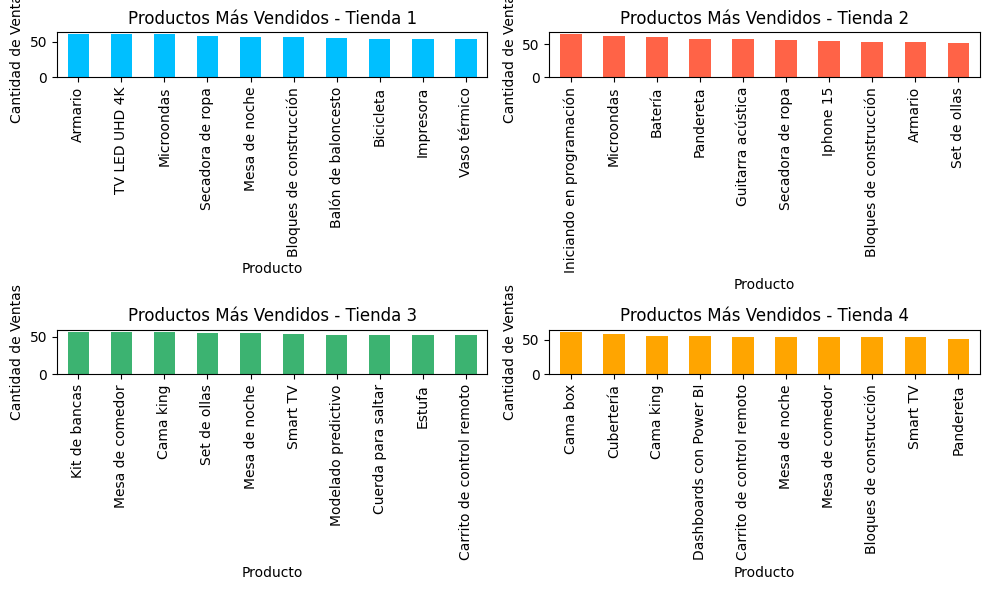

In [28]:
# Contar productos vendidos por tienda
productos_mas_vendidos_tienda1 = tienda.groupby('Producto')['Producto'].count().sort_values(ascending=False)
productos_mas_vendidos_tienda2 = tienda2.groupby('Producto')['Producto'].count().sort_values(ascending=False)
productos_mas_vendidos_tienda3 = tienda3.groupby('Producto')['Producto'].count().sort_values(ascending=False)
productos_mas_vendidos_tienda4 = tienda4.groupby('Producto')['Producto'].count().sort_values(ascending=False)

# Graficar los productos más vendidos (y menos vendidos) para cada tienda
plt.figure(figsize=(10, 6))

# Tienda 1
plt.subplot(2, 2, 1)
productos_mas_vendidos_tienda1.head(10).plot(kind='bar', color='deepskyblue')
plt.title("Productos Más Vendidos - Tienda 1")
plt.xlabel('Producto')
plt.ylabel('Cantidad de Ventas')

# Tienda 2
plt.subplot(2, 2, 2)
productos_mas_vendidos_tienda2.head(10).plot(kind='bar', color='tomato')
plt.title("Productos Más Vendidos - Tienda 2")
plt.xlabel('Producto')
plt.ylabel('Cantidad de Ventas')

# Tienda 3
plt.subplot(2, 2, 3)
productos_mas_vendidos_tienda3.head(10).plot(kind='bar', color='mediumseagreen')
plt.title("Productos Más Vendidos - Tienda 3")
plt.xlabel('Producto')
plt.ylabel('Cantidad de Ventas')

# Tienda 4
plt.subplot(2, 2, 4)
productos_mas_vendidos_tienda4.head(10).plot(kind='bar', color='orange')
plt.title("Productos Más Vendidos - Tienda 4")
plt.xlabel('Producto')
plt.ylabel('Cantidad de Ventas')

plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

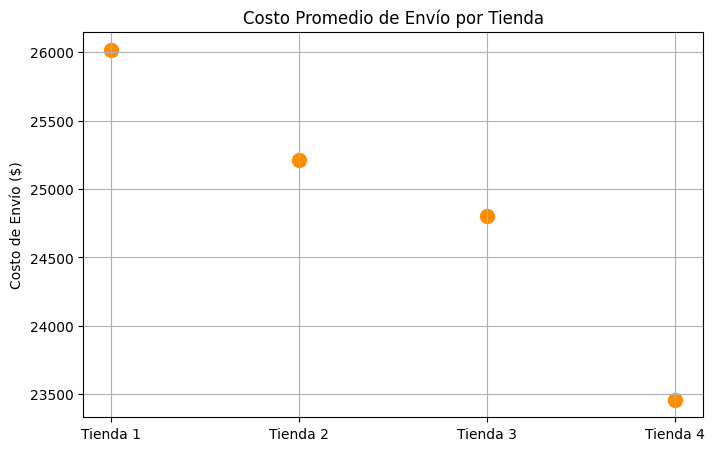

In [29]:
# Promedio de envío
envio_promedio = [
    tienda['Costo de envío'].mean(),
    tienda2['Costo de envío'].mean(),
    tienda3['Costo de envío'].mean(),
    tienda4['Costo de envío'].mean()
]

# Diagrama de dispersión
plt.figure(figsize=(8, 5))
plt.scatter(tiendas, envio_promedio, color='darkorange', s=100)
plt.title("Costo Promedio de Envío por Tienda")
plt.ylabel("Costo de Envío ($)")
plt.grid(True)
plt.show()

